In [1]:
import os
import csv
import random
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import MinMaxScaler

dtypes = {
        'IsCanceled':                                    'float64',
        'LeadTime':                                          'float64',
        'StaysInWeekendNights':                                     'float64',
        'StaysInWeekNights':                                     'float64',
        'Adults':                            'float64',
        'Children':                            'float64',
        'Babies':                                  'float64',
        'Meal':                                    'category',
        'Country':                                               'category',
        'MarketSegment':                                    'category',
        'DistributionChannel':                                       'category',
        'IsRepeatedGuest':                               'float64',
        'PreviousCancellations':                                    'float64',
        'PreviousBookingsNotCanceled':                          'float64',
        'ReservedRoomType':                                             'category',
        'AssignedRoomType':                                            'category',
        'BookingChanges':                                                'float64',
        'DepositType':                                              'category',
        'Agent':                                              'category',
        'Company':                                 'category',
        'DaysInWaitingList':                                           'float64',
        'CustomerType':                                           'category',
        'ADR':                                          'float64',
        'RequiredCarParkingSpaces':                                      'float64',
        'TotalOfSpecialRequests':                                              'float64',
        'ReservationStatus':                                                'category'
        }

/home/michael/anaconda3/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
train_df = pd.read_csv("H1full.csv", dtype=dtypes, converters={'ArrivalDateWeekNumber': '{:0>2}'.format})

In [3]:
a=train_df.head()
b=train_df
b
c=b.sort_values(['ArrivalDateYear','ArrivalDateWeekNumber'], ascending=True)
c=pd.DataFrame(c)
c
type(c)

pandas.core.frame.DataFrame

In [4]:
from pandas import DataFrame  

df = DataFrame(c, columns= ['ArrivalDateYear', 'ArrivalDateWeekNumber']) 
df

,ArrivalDateYear,ArrivalDateWeekNumber
0,2015,27
1,2015,27
2,2015,27
3,2015,27
4,2015,27
...,...,...
40055,2017,35
40056,2017,35
40057,2017,35
40058,2017,35


In [5]:
# https://datatofish.com/concatenate-values-python/

df1 = df['ArrivalDateYear'].map(str) + df['ArrivalDateWeekNumber'].map(str)
print (df1)
df1=pd.DataFrame(df1)

0        201527
1        201527
2        201527
3        201527
4        201527
          ...  
40055    201735
40056    201735
40057    201735
40058    201735
40059    201735
Length: 40060, dtype: object


In [6]:
df2 = DataFrame(c, columns= ['ADR']) 
df2

,ADR
0,0.00
1,0.00
2,75.00
3,75.00
4,98.00
...,...
40055,89.75
40056,202.27
40057,153.57
40058,112.80


In [7]:
type(df1)

pandas.core.frame.DataFrame

In [8]:
df3=pd.concat([df1, df2], axis = 1)
df3
df3.columns = ['FullDate', 'ADR']

In [9]:
df3
df3.sort_values(['FullDate','ADR'], ascending=True)

,FullDate,ADR
0,201527,0.00
1,201527,0.00
125,201527,0.00
14463,201527,4.00
81,201527,55.68
...,...,...
13770,201735,328.00
13745,201735,341.00
39847,201735,344.67
39870,201735,351.00


In [10]:
df4 = df3.groupby('FullDate').agg("mean")
df4
df4.sort_values(['FullDate'], ascending=True)

,ADR
FullDate,
201527,100.099096
201528,110.399188
201529,128.112023
201530,140.592271
201531,145.563833
...,...
201731,208.712512
201732,211.528351
201733,211.162040


In [11]:
tseries=df4['ADR']
tseries

FullDate
201527    100.099096
201528    110.399188
201529    128.112023
201530    140.592271
201531    145.563833
             ...    
201731    208.712512
201732    211.528351
201733    211.162040
201734    210.284883
201735    186.204007
Name: ADR, Length: 115, dtype: float64

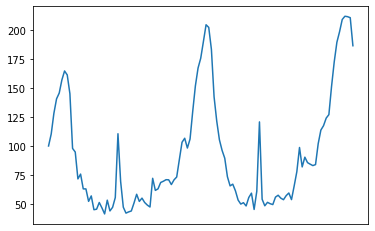

In [12]:
import matplotlib.pyplot as plt
plt.plot(tseries)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.show()

In [13]:
tseriesr=pd.Series(tseries)
type(tseriesr)

# logvalue=np.log(tseriesr)
train, val = tseriesr[1:80], tseriesr[81:100]

In [14]:
type(val)

pandas.core.series.Series

In [15]:
train

FullDate
201528    110.399188
201529    128.112023
201530    140.592271
201531    145.563833
201532    156.862535
             ...    
201649     55.847147
201650     59.584783
201651     45.597907
201652     61.228039
201653    120.788480
Name: ADR, Length: 79, dtype: float64

In [16]:
val

FullDate
201702    48.720309
201703    51.701445
201704    50.528252
201705    49.782031
201706    56.185514
201707    57.799410
201708    55.279261
201709    53.957228
201710    57.434595
201711    59.728146
201712    54.048282
201713    65.763934
201714    78.048216
201715    98.806723
201716    82.126727
201717    90.483817
201718    85.819405
201719    84.468191
201720    83.256215
Name: ADR, dtype: float64

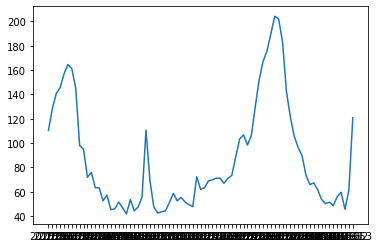

In [17]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.tsa.stattools as ts

plt.plot(train)
plt.show()

/home/michael/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


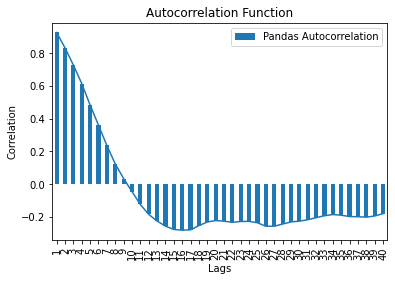

In [18]:
#Autocorrelation Plot
acf_1 =  acf(train)[1:50]
test_df = pd.DataFrame([acf_1]).T
test_df.columns = ['Pandas Autocorrelation']
test_df.index += 1
test_df.plot(kind='bar')
plt.plot(acf_1)
plt.xlabel('Lags')
plt.ylabel('Correlation')
plt.title(r'Autocorrelation Function')
plt.show()

In [19]:
acf_1

array([ 0.92670431,  0.83260809,  0.7272653 ,  0.61428236,  0.48319049,
        0.35978261,  0.23551544,  0.12332552,  0.03324693, -0.0459374 ,
       -0.12525858, -0.185804  , -0.22655127, -0.25764274, -0.27822816,
       -0.28244634, -0.28038011, -0.25430112, -0.23258646, -0.22383016,
       -0.22741   , -0.23440215, -0.22924083, -0.22858277, -0.23715619,
       -0.25858118, -0.25822688, -0.24505403, -0.23185447, -0.22741955,
       -0.21861615, -0.20594361, -0.19399095, -0.18681484, -0.19087963,
       -0.19925559, -0.20023871, -0.20275473, -0.19562402, -0.18097516])

/home/michael/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


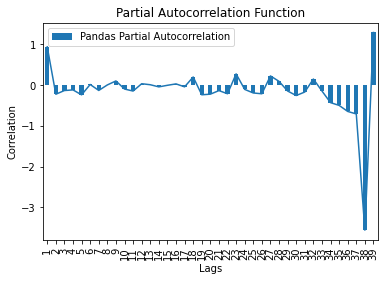

In [20]:
#Partial Autocorrelation Plot
pacf_1 =  pacf(train)[1:40]
val_df = pd.DataFrame([pacf_1]).T
val_df.columns = ['Pandas Partial Autocorrelation']
val_df.index += 1
val_df.plot(kind='bar')
plt.plot(pacf_1)
plt.xlabel('Lags')
plt.ylabel('Correlation')
plt.title(r'Partial Autocorrelation Function')
plt.show()

In [21]:
pacf_1

array([ 0.93858514, -0.2243259 , -0.13361697, -0.11828836, -0.23895957,
        0.01477244, -0.13146615,  0.00374399,  0.10185304, -0.09702654,
       -0.1464912 ,  0.03353504,  0.00897022, -0.04383393, -0.00513529,
        0.02949768, -0.04302988,  0.19912013, -0.23796767, -0.22274342,
       -0.13526088, -0.21244059,  0.27512332, -0.10552097, -0.19352247,
       -0.21315465,  0.22481068,  0.0917586 , -0.14506782, -0.25620953,
       -0.17009667,  0.14896769, -0.14492881, -0.43058212, -0.49828616,
       -0.64657606, -0.70797943, -3.56018829,  1.29071644])

In [22]:
#Dickey-Fuller Test
result = ts.adfuller(train)
result
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.161952
p-value: 0.220343
Critical Values:
	1%: -3.518
	5%: -2.900
	10%: -2.587


In [23]:
# https://www.kdnuggets.com/2018/02/google-colab-free-gpu-tutorial-tensorflow-keras-pytorch.html/2
# https://pypi.org/project/pyramid-arima/
!pip install -q pyramid-arima==0.9.0

In [24]:
from pyramid.arima import auto_arima
Arima_model=auto_arima(train, start_p=0, start_q=0, max_p=10, max_q=10, start_P=0, start_Q=0, max_P=10, max_Q=10, m=52, seasonal=True, trace=True, d=1, D=1, error_action='warn', suppress_warnings=True, random_state = 20, n_fits=30)

/home/michael/.local/lib/python3.6/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/home/michael/.local/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)
/home/michael/anaconda3/lib/python3.6/site-packages/pyramid/__init__.py:68: UserWarning: 
    The 'pyramid' package will be migrating to a new namespace beginning in 
    version 1.0.0: 'pmdarima'. This is

Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 52); AIC=245.745, BIC=248.261, Fit time=0.121 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 52); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 52); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 1, 0, 52); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 1, 52); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 1, 1, 52); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 1, 0, 52); AIC=244.398, BIC=248.172, Fit time=0.424 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 0, 52); AIC=245.478, BIC=250.510, Fit time=0.689 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 1, 0, 52); AIC=247.302, BIC=253.592, Fit time=0.918 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 1, 1, 52); AIC=nan, BIC=nan, Fit time=nan seconds


/home/michael/anaconda3/lib/python3.6/site-packages/pyramid/arima/auto.py:864: ModelFitWarning: Unable to fit ARIMA for order=(1, 1, 0) seasonal_order=(0, 1, 1, 52); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)
/home/michael/anaconda3/lib/python3.6/site-packages/pyramid/arima/auto.py:864: ModelFitWarning: Unable to fit ARIMA for order=(1, 1, 0) seasonal_order=(1, 1, 1, 52); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)


Fit ARIMA: order=(2, 1, 0) seasonal_order=(0, 1, 0, 52); AIC=245.416, BIC=250.448, Fit time=0.711 seconds
Total fit time: 2.877 seconds


In [25]:
Arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   79
Model:             SARIMAX(1, 1, 0)x(0, 1, 0, 52)   Log Likelihood                -119.199
Date:                            Wed, 18 Mar 2020   AIC                            244.398
Time:                                    11:34:22   BIC                            248.172
Sample:                                         0   HQIC                           245.485
                                             - 79                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.1410      6.054      0.188      0.850     -10.724      13.006
ar.L1         -0.5219      0.247     -2.115      0.034      -1.005      -0.038
sigma2       555.1035    130.997      4.238      0.000     298.355     811.852
===================================================================================
Ljung-Box (Q):                         nan   Jarque-Bera (JB):                15.38
Prob(Q):                               nan   Prob(JB):                         0.00
Heteroskedasticity (H):               3.37   Skew:                             1.05
Prob(H) (two-sided):                  0.08   Kurtosis:                         6.12
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [26]:
prediction=pd.DataFrame(Arima_model.predict(n_periods=19), index=val.index)
prediction.columns = ['Predicted_Cancellations']
predictions=prediction['Predicted_Cancellations']

In [27]:
val

FullDate
201702    48.720309
201703    51.701445
201704    50.528252
201705    49.782031
201706    56.185514
201707    57.799410
201708    55.279261
201709    53.957228
201710    57.434595
201711    59.728146
201712    54.048282
201713    65.763934
201714    78.048216
201715    98.806723
201716    82.126727
201717    90.483817
201718    85.819405
201719    84.468191
201720    83.256215
Name: ADR, dtype: float64

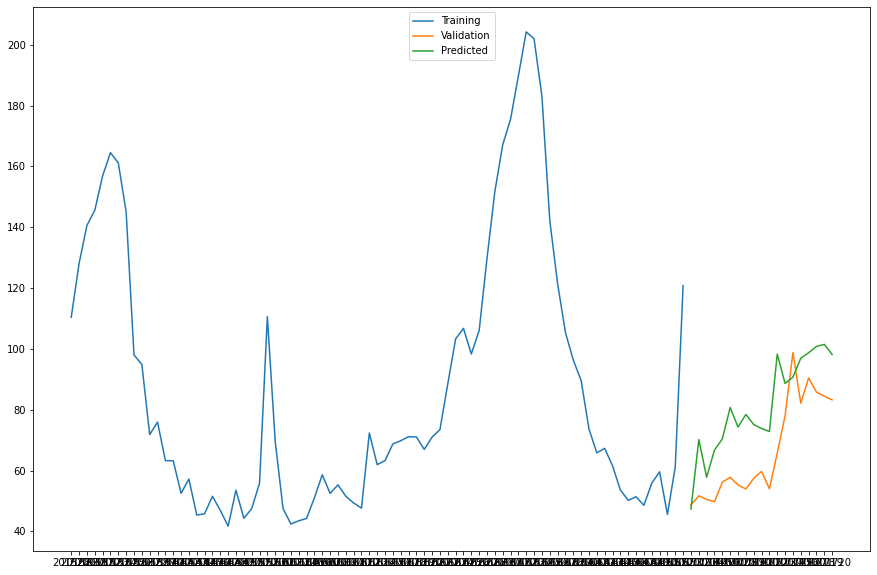

In [28]:
plt.figure(figsize=(15,10))
plt.plot(train, label='Training')
plt.plot(val, label='Validation')
plt.plot(prediction, label='Predicted')
plt.legend(loc = 'upper center')
plt.show()

In [29]:
import numpy as np

def mda(actual: np.ndarray, predicted: np.ndarray):
    """ Mean Directional Accuracy """
    return np.mean((np.sign(actual[1:] - actual[:-1]) == np.sign(predicted[1:] - predicted[:-1])).astype(int))

In [30]:
type(predictions)

pandas.core.series.Series

In [31]:
mda(val, predictions)

0.8947368421052632

In [32]:
import math
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(val, predictions)
rmse = math.sqrt(mse)
print('RMSE: %f' % rmse)

RMSE: 17.013202


In [33]:
test=tseries.iloc[100:115]
test = np.array(test)
test.shape

(15,)

In [34]:
test=test.reshape(-1)
test

array([ 84.12304147, 102.08452794, 113.74824022, 117.55218509,
       124.05833795, 127.02865337, 151.23568966, 172.26865909,
       189.16831978, 198.22268542, 208.71251185, 211.52835052,
       211.16204036, 210.28488251, 186.20400722])

In [35]:
test.shape

(15,)

In [36]:
test = pd.Series(test)

In [37]:
predictionnew=pd.DataFrame(Arima_model.predict(n_periods=15), index=test.index)
predictionnew.columns = ['Unseen_Predicted_Cancellations']
predictionsnew=predictionnew['Unseen_Predicted_Cancellations']

In [38]:
mse_new = mean_squared_error(test, predictionsnew)
rmse_new = math.sqrt(mse_new)
print('RMSE: %f' % rmse_new)

RMSE: 91.236572


In [39]:
mda(test, predictionsnew)

0.8666666666666667

In [40]:
forecast_error_new = (predictionsnew-test)
forecast_error_new

0     -36.765373
1     -31.881226
2     -55.934578
3     -50.816356
4     -53.643330
5     -46.280621
6     -76.926352
7     -93.835457
8    -114.013771
9    -124.402931
10   -135.873109
11   -113.240455
12   -122.527546
13   -119.574044
14    -89.270680
dtype: float64

In [41]:
mean_forecast_error_new = np.mean(forecast_error_new)
mean_forecast_error_new

-84.33238861157821

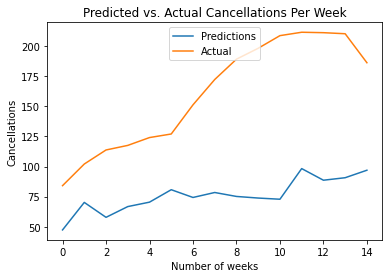

In [42]:
predictons, =plt.plot(predictionsnew, label='Predictions')
actual, =plt.plot(test, label='Actual')
plt.xlabel('Number of weeks')
plt.ylabel('Cancellations')
plt.title("Predicted vs. Actual Cancellations Per Week")
plt.legend(loc = 'upper center')
plt.show()